
# **MIS710 Lecture 7: Introduction to Artificial Neural Networks**

Author: Associate Professor Lemai Nguyen

Objectives:

* To learn to build and test ANN models for classification and regression
* To evaluate the models based on the ML problem
* To compare the models based on the ML problem

# **Import libraries and functions**




In [1]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# **1. Case One: Biopsy**

**Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable.

**Approaches**: ANN using schikit learn MLP Classifier and Keras

**Dataset**:
V1, V2, V7-V9: biological variables
Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients


## **1.1 Loading data**


1.   Load the dataset
2.   Have an initial view of the data



In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# load dataset
#records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/biopsy_ln.csv")
records = pd.read_csv('https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%207/biopsy_ln.csv')
print(records)

          ID  V1  V2  V7  V8  V9 diagnosis
0    1177399   8   3   1   6   2   healthy
1    1246562  10   2   1   1   2   healthy
2    1108370   9   5   2   1   5   healthy
3    1165926   9   6   2   9  10   healthy
4    1167439   2   3   2   5   1   healthy
..       ...  ..  ..  ..  ..  ..       ...
694  1124651   1   3   7   2   1   healthy
695  1137156   2   2   7   1   1   healthy
696  1147044   3   1   7   1   1   healthy
697  1213375   8   4   7   8   2   healthy
698   721482   4   4   7   3   1   healthy

[699 rows x 7 columns]


## **1.2 Data pre-processing and EDA**


### **Inspecting and cleansing data**
* Inspect columns
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


In [4]:
# Write code to view size, list of variables and data types; hint: use info()
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   V1         699 non-null    int64 
 2   V2         699 non-null    int64 
 3   V7         699 non-null    int64 
 4   V8         699 non-null    int64 
 5   V9         699 non-null    int64 
 6   diagnosis  699 non-null    object
dtypes: int64(6), object(1)
memory usage: 38.4+ KB


In [5]:
# Write code to view samples; hint: use sample(n) where a is the number of samples
print(records.sample(10))

          ID  V1  V2  V7  V8  V9  diagnosis
635   666942   1   1   3   1   1    healthy
259  1214092   1   1   1   1   1    healthy
453   640712   1   1   2   1   1    healthy
604  1217264   1   1   3   1   1    healthy
107  1099510  10   4   6   5   2  cancerous
694  1124651   1   3   7   2   1    healthy
140  1221863  10  10   7  10   4  cancerous
95    303213  10   4   5   5   1  cancerous
41    832226   3   4   3   3   1  cancerous
187  1175937   5   4   8  10   1  cancerous


In [6]:
#Write code to inspect missing data; hint: isnull().sum()
print(records.isnull().sum())

ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64


In [7]:
#Write code to drop irrelevant variable(s) - this will help reduce the cognitive load as well.
#Drop ID; hint: use .drop(['ID'], axis=1)
records=records.drop(['ID'], axis=1)
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
dtypes: int64(5), object(1)
memory usage: 32.9+ KB


In [8]:
#OPTIONAL: Practice using dataframe:
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

Sample size: 699
Number of columns: 6


### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.

**Explore the relationships between the target variable and other variables, and explore the relationships among the non-target variables as well**

**Explore the target variable**

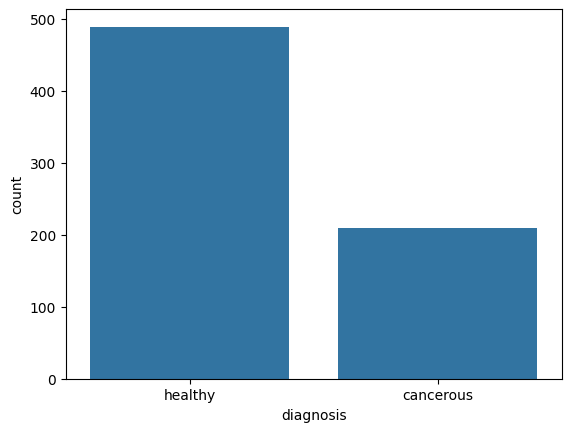

In [9]:
from pandas.io.parsers.readers import annotations
    #create barchats
plot=sns.countplot(data=records, x='diagnosis')
plt.show()

In [10]:
records['diagnosis'].value_counts()

diagnosis
healthy      489
cancerous    210
Name: count, dtype: int64

**Explore numeric variables**

In [11]:
#Write code to view descriptive stats of numeric variables; hint: use describe()
records.describe()

,V1,V2,V7,V8,V9
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


See the above outcome: note the range across variables;
note mean and std, note mean and median, IQR.. for each numeric variable,

V1 :

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: V1, dtype: float64




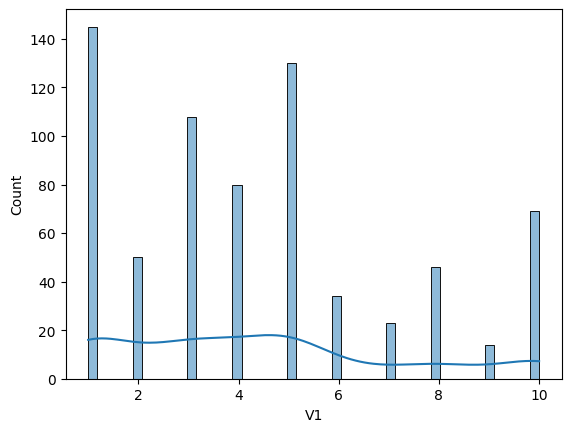

V2 :

count    699.000000
mean       3.134478
std        3.051459
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: V2, dtype: float64




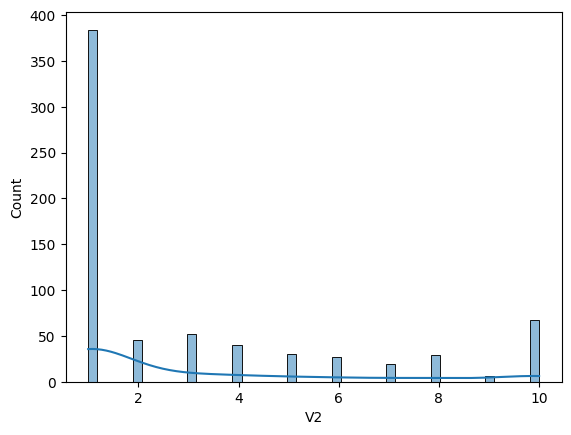

V7 :

count    699.000000
mean       3.437768
std        2.438364
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: V7, dtype: float64




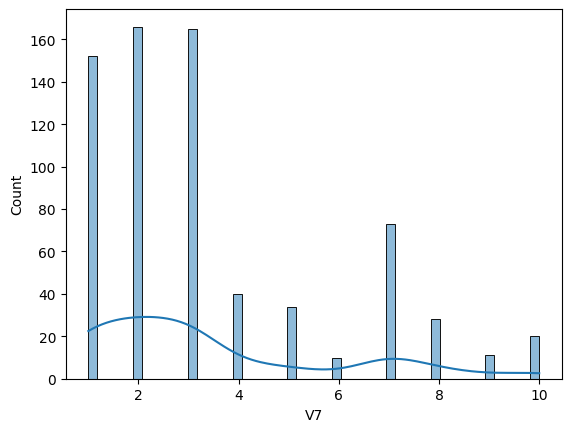

V8 :

count    699.000000
mean       2.866953
std        3.053634
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: V8, dtype: float64




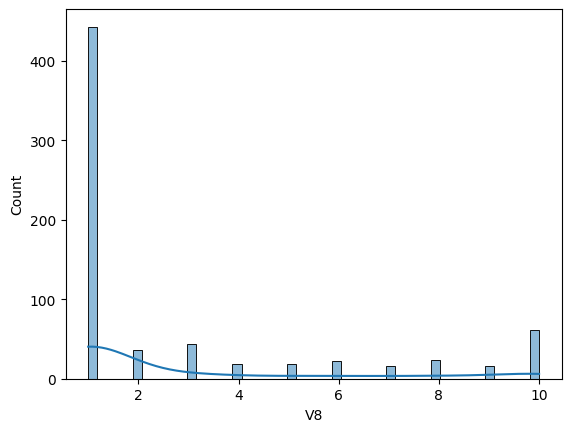

V9 :

count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: V9, dtype: float64




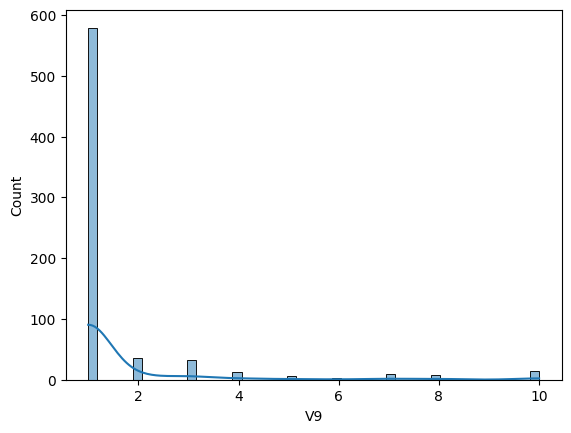

In [12]:
#Let's create both descriptive stats and histograms for numeric variables
nums=['V1', 'V2', 'V7', 'V8', 'V9']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins = 50, kde=True)
   plt.show()

In [13]:
records['diagnosis'].value_counts()

diagnosis
healthy      489
cancerous    210
Name: count, dtype: int64

**Do it yourself: examine numeric variables using descriptive stats and boxplots**

V1 :

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: V1, dtype: float64




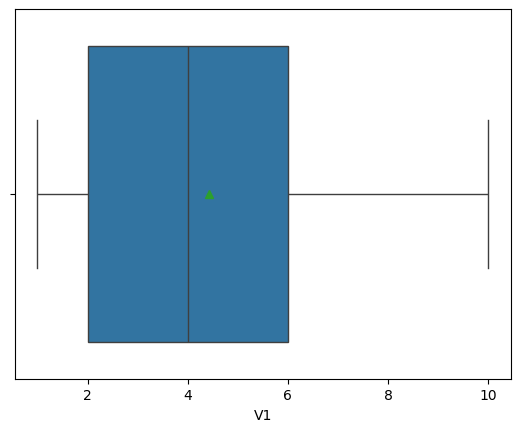

V2 :

count    699.000000
mean       3.134478
std        3.051459
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: V2, dtype: float64




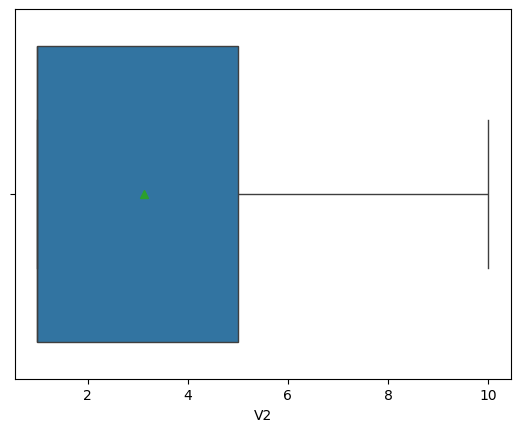

V7 :

count    699.000000
mean       3.437768
std        2.438364
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: V7, dtype: float64




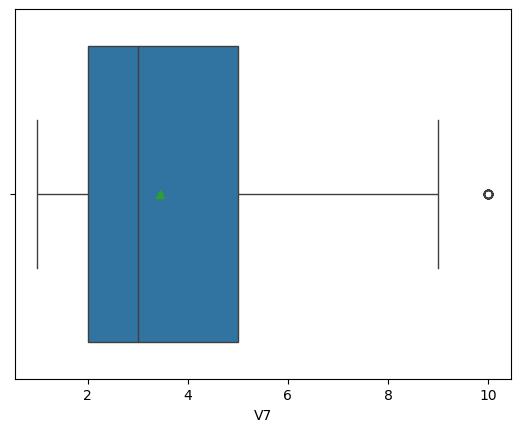

V8 :

count    699.000000
mean       2.866953
std        3.053634
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: V8, dtype: float64




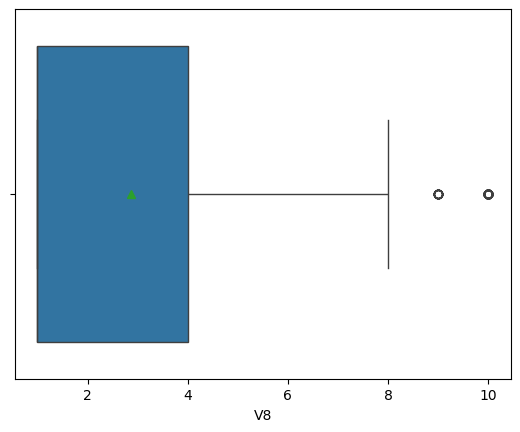

V9 :

count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: V9, dtype: float64




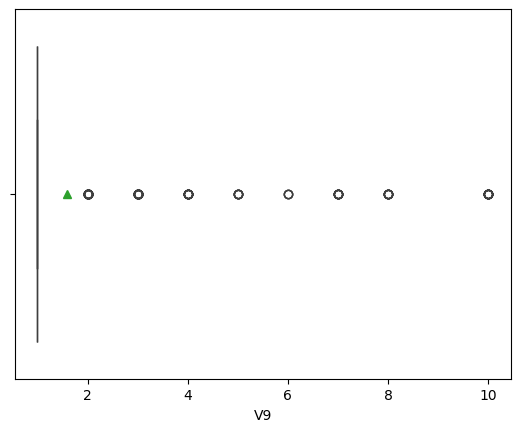

In [14]:
#Let's create both descriptive stats and boxplots for numeric variables
#nums=['V1', 'V2', 'V7', 'V8', 'V9']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.boxplot(data=records, x=i, showmeans=True)
   plt.show()

**Explore bivariable relationships between each numeric variable against the categorical target **

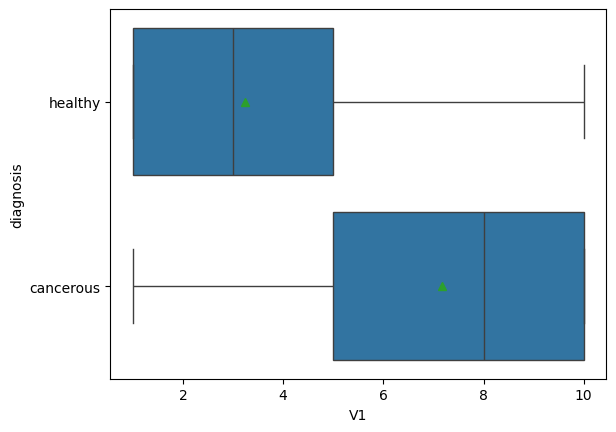

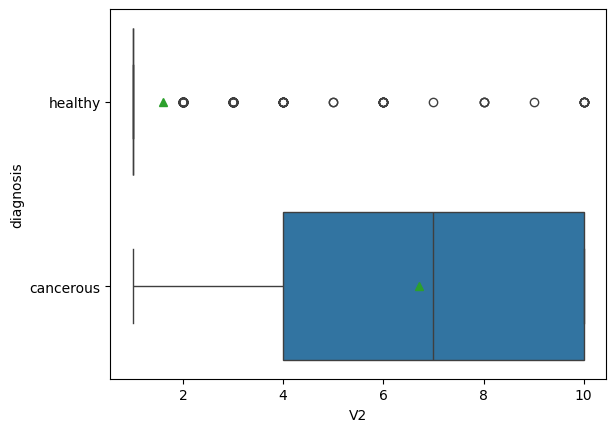

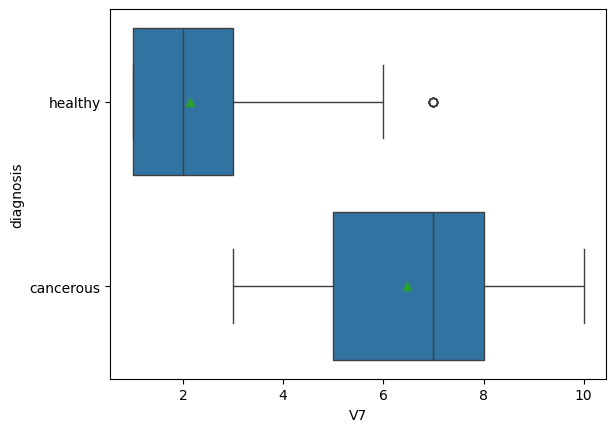

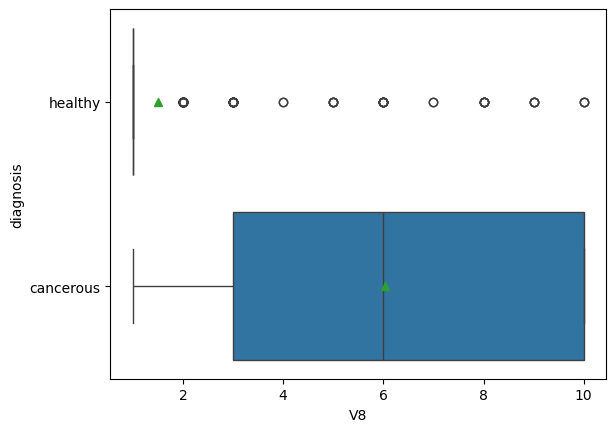

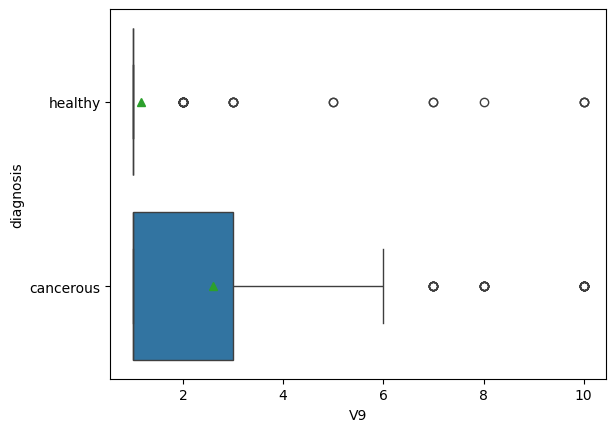

In [15]:
#Reuse the code above and break the distribution by the target
#nums=['V1', 'V2', 'V7', 'V8', 'V9']
for i in nums:
   sns.boxplot(data=records, x=i, showmeans=True, y='diagnosis')
   plt.show()

You may need to perform more bivariate and multivariable analyses depending on the datasets given to you, and domain expertise available. You may need to read previous reports/papers to inform your EDA.

**Multivariate analysis**

<Axes: >

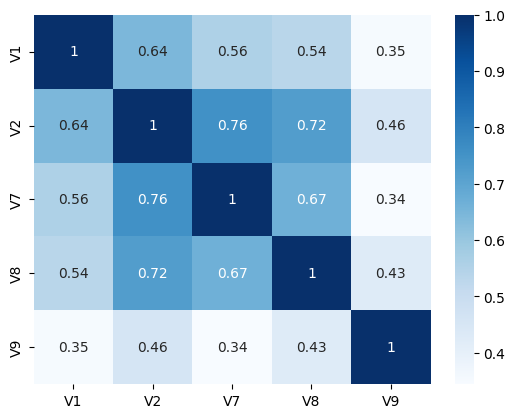

In [16]:
#Note the diagnosis is categorical, thus, you are examining correlation amongst potential predictors now
sns.heatmap(data=records[['V1','V2','V7', 'V8','V9']].corr(), cmap="Blues", annot=True)

Note strong, moderare and weak correlations

### **Data preparation**
* Data conversion
* Feature selection
* Target specification
* Data spliting
* Data scaling (X_train and X-test)

**Data conversion**

In [17]:
#convert categorical data to numerical
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0

records['diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

     V1  V2  V7  V8  V9  diagnosis
564   4   1   3   1   1          0
489   3   1   2   1   1          0
92   10   4   5   3   2          1
532   4   2   2   1   1          0
323   1   1   1   1   1          0
474   1   3   2   2   1          0
405   5   1   2   1   1          0
190   8  10   8  10   6          1
192  10   5   8   9   1          1
178   7   8   7   2   3          1


#### **OPTIONAL: Save file for future use**

Let's add a little more to our Python skills

In [18]:
import io

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
try:
    # save the DataFrame to a CSV file
    records.to_csv('/content/drive/My Drive/Colab Notebooks/MIS710 2023 T2/Week 7/processed_biopsy_processed.csv', index=False)
    print('File saved successfully!')
except Exception as e:
    print(f'An error occurred: {e}')

File saved successfully!


**Feature Selection and Target Specification**

Select predictors (attributes) for Classification
Set role (Target)

In [21]:
#Selecting predictors
features =['V1', 'V2', 'V7', 'V8', 'V9'] #you can select a range of columns features = records.columns[0:5]

X= records[features]
y= records['diagnosis']  # Target variable


As all numeric variables are of the same range, there is no need for data scaling, but you should check this step in general.

**Split the dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=2024)  # 75% training and 25% testing

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(524, 5)
(524,)
(175, 5)
(175,)


In [24]:
#Let's practice
#how many cancer cases are in the training and test sets
print((y_train==1).sum())
print((y_test==1).sum())

157
53


## **1.3 MLPClassifier model building for the classification problem**

Read about the MLP classifiers at:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [25]:
#import classes and functions
from sklearn.neural_network import MLPClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

**Train a neural network**

In [26]:
# create an MLP classifier with 2 hidden layers
ann_clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2024, early_stopping=True)


In [27]:
# train the classifier on the training data
ann_clf.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16), max_iter=1000,
              random_state=2024)

**Appy the model to make predictions**

In [28]:
# Write code to make predictions using the classifier on the testing data
y_pred = ann_clf.predict(X_test)


In [29]:
#get predicted probabilities for the main class
y_pred_probs = ann_clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]

## **1.4. Performance Evaluation**
* Classification report
* Confusion matrix
* ROC and AUC

In [30]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[110  12]
 [ 14  39]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       122
           1       0.76      0.74      0.75        53

    accuracy                           0.85       175
   macro avg       0.83      0.82      0.82       175
weighted avg       0.85      0.85      0.85       175



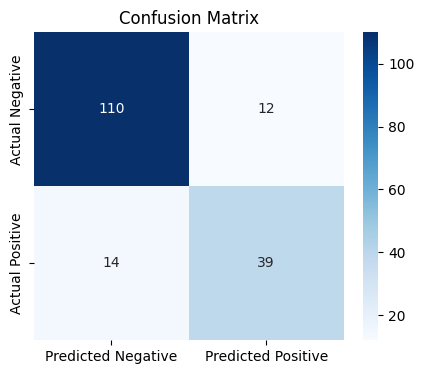

In [31]:

# Display confusion matrix
df_cm = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

AUC: 0.796


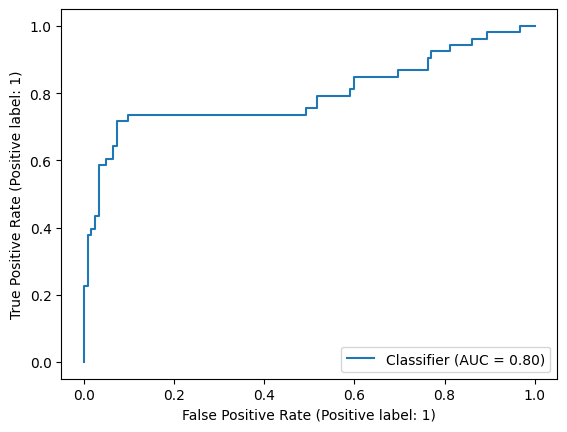

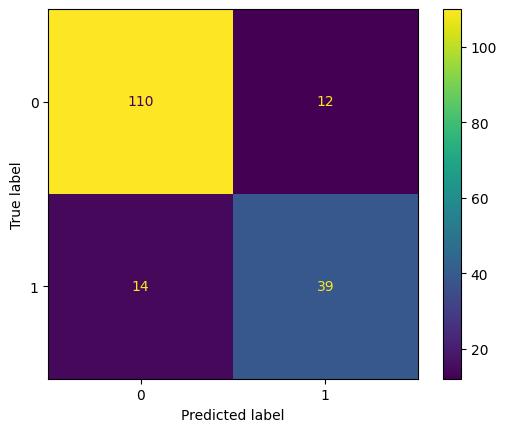

In [32]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, y_pred_probs)
auc_mlp=metrics.auc(fpr_mlp, tpr_mlp)
print('AUC:', '%.3f' % auc_mlp)

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()



In [33]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, f'Probability: %5.3f':y_pred_probs})
inspection=pd.concat([X_test,inspection], axis=1)
inspection.sample(10)

,V1,V2,V7,V8,V9,Actual,Predicted,Probability: %5.3f
11,7,8,3,8,2,0,1,0.867125
64,10,10,4,10,10,1,1,0.594152
306,3,1,1,1,1,0,0,0.287311
70,2,7,4,9,4,1,1,0.952049
666,1,1,3,1,1,0,0,0.402007
269,1,1,1,1,1,0,0,0.383814
570,1,1,3,1,1,0,0,0.402007
529,7,1,2,1,1,0,0,0.069578
55,3,3,4,4,1,1,1,0.737778
697,8,4,7,8,2,0,1,0.681063


## **1.5 OPTIONAL: A brief Intro to Keras**
scikit-learn's MLP and Keras are popular libraries for building and training artificial neural networks (ANNs) in Python.

Scikit-learn's MLP has a simpler and more straightforward API compared to Keras. Keras has a more complex and flexible API, which allows you to build models using a variety of functional and sequential APIs.

Scikit-learn's MLP supports only fully connected feedforward neural networks. Keras supports a wider range of architectures including convolutional neural networks (CNNs), recurrent neural networks (RNNs), and more. Keras is built on top of TensorFlow, which allows you to use GPUs and TPUs for faster computation, especially when working with large datasets or complex models.

Scikit-learn's MLP is designed to be easy to use, especially for beginners who are new to deep learning. Keras, on the other hand, requires more expertise and knowledge of deep learning concepts, but it provides more flexibility and control over the model.

### **Model Building**

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=2024)  # 75% training and 25% testing

#inspect the split datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(524, 5)
(524,)
(175, 5)
(175,)


ReLU(x) = max(0, x) is a non-linear transformation that returns value of a positive number and returns 0 of a negative number

In [36]:
# Construct the ANN model structure
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Train model
early_stopping = EarlyStopping(patience=5, monitor='val_loss')
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stopping])


Epoch 1/10
14/14 [==============================] - 2s 23ms/step - loss: 0.7163 - accuracy: 0.2936 - val_loss: 0.6642 - val_accuracy: 0.3238
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6602 - accuracy: 0.4248 - val_loss: 0.6288 - val_accuracy: 0.8190
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.6225 - accuracy: 0.7709 - val_loss: 0.5883 - val_accuracy: 0.8095
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.8138 - val_loss: 0.5562 - val_accuracy: 0.8952
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 0.8473 - val_loss: 0.5335 - val_accuracy: 0.8857
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5442 - accuracy: 0.8473 - val_loss: 0.5082 - val_accuracy: 0.8857
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.8544 - val_loss: 0.4839 - val_accuracy: 0.9143
Epoch 8/10
14/14 [=

In [38]:
# Predict using the Keras model and calculate performance metrics
# Predict test data labels
y_pred_probs_keras = model.predict(X_test)
y_pred_keras = (y_pred_probs_keras > 0.5)

6/6 [==============================] - 0s 2ms/step


### **Performance Evaluation**
* Classification report
* Confusion matrix
* ROC and AUC

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
# Compute performance evaluation results
accuracy_keras = accuracy_score(y_test, y_pred_keras)
precision_keras = precision_score(y_test, y_pred_keras)
recall_keras = recall_score(y_test, y_pred_keras)
f1_score_keras = f1_score(y_test, y_pred_keras)

In [41]:
# Print the performance metrics for Keras model
print("\nKeras Model:")
print("Accuracy: {:.2f}".format(accuracy_keras))
print("Precision: {:.2f}".format(precision_keras))
print("Recall: {:.2f}".format(recall_keras))
print("F1 Score: {:.2f}".format(f1_score_keras))


Keras Model:
Accuracy: 0.87
Precision: 0.79
Recall: 0.77
F1 Score: 0.78


In [42]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
cm_keras=confusion_matrix(y_test, y_pred_keras)
print(cm_keras)
print(classification_report(y_test, y_pred_keras))

[[111  11]
 [ 12  41]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       122
           1       0.79      0.77      0.78        53

    accuracy                           0.87       175
   macro avg       0.85      0.84      0.84       175
weighted avg       0.87      0.87      0.87       175



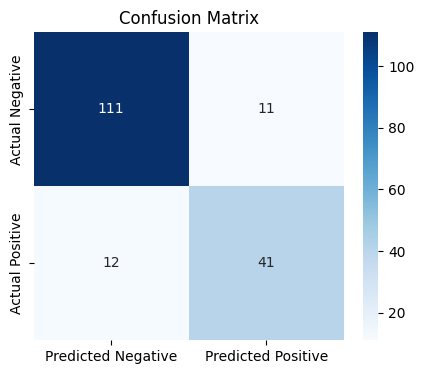

In [43]:

# Display confusion matrix
df_cm = pd.DataFrame(cm_keras, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(5,4))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.show()

AUC: 0.877


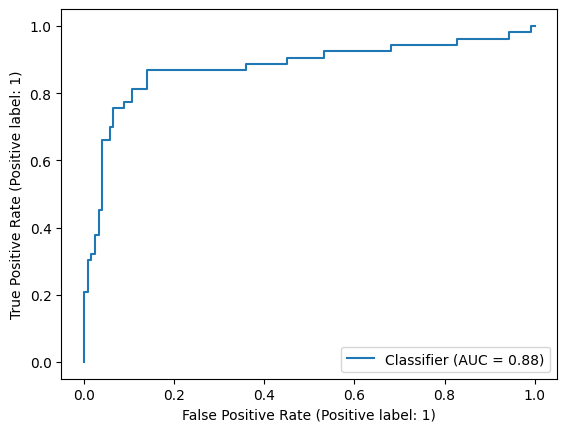

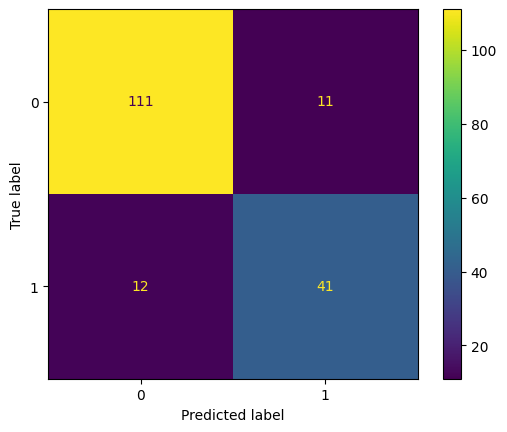

In [44]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

fpr_keras, tpr_keras, thresholds = roc_curve(y_test, y_pred_probs_keras)
auc_keras=metrics.auc(fpr_keras, tpr_keras)
print('AUC:', '%.3f' % auc_keras)

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs_keras)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_keras)
plt.show()

## **1.6 Model Comparision**
Let's compare the Scikit-learn and Keras MLP models
(To do this you should run the optional task 1.5 above first. Skip this if you have not)

In [45]:
# calculate performance metrics for the Scikit-learn MLP
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)

print("\nSklearn Model:")
print('Scikit-learn MLP Accuracy: ','%.2f' % accuracy_mlp)
print('Scikit-learn MLP Precision: ', '%.2f' % precision_mlp)
print('Scikit-learn MLP Recall: ',  '%.2f' % recall_mlp)
print('Scikit-learn MLP F1 :',  '%.2f' % f1_mlp)


Sklearn Model:
Scikit-learn MLP Accuracy:  0.85
Scikit-learn MLP Precision:  0.76
Scikit-learn MLP Recall:  0.74
Scikit-learn MLP F1 : 0.75


In [46]:
# Write code to Print the performance metrics for Keras model (If you have done the Optional Task 1.5)
print("\nKeras Model:")
print("Keras MLP Accuracy: {:.2f}".format(accuracy_keras))
print("Keras MLP Precision: {:.2f}".format(precision_keras))
print("Keras MLP Recall: {:.2f}".format(recall_keras))
print("Keras MLP F1 Score: {:.2f}".format(f1_score_keras))


Keras Model:
Keras MLP Accuracy: 0.87
Keras MLP Precision: 0.79
Keras MLP Recall: 0.77
Keras MLP F1 Score: 0.78


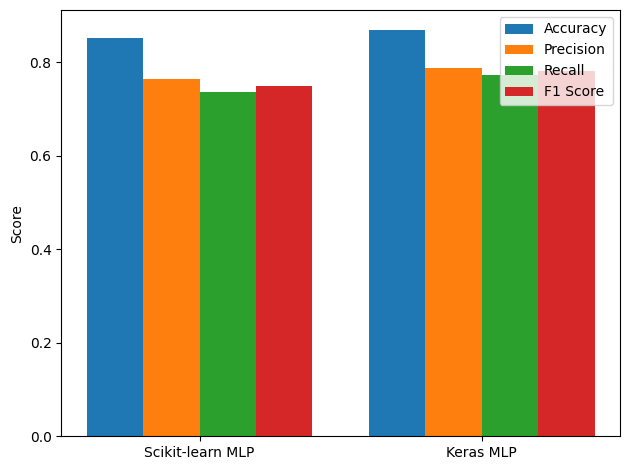

In [47]:
# create bar chart
models = ['Scikit-learn MLP', 'Keras MLP']
accuracy = [accuracy_mlp, accuracy_keras]
precision = [precision_mlp, precision_keras]
recall = [recall_mlp, recall_keras]
f1 = [f1_mlp, f1_score_keras]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

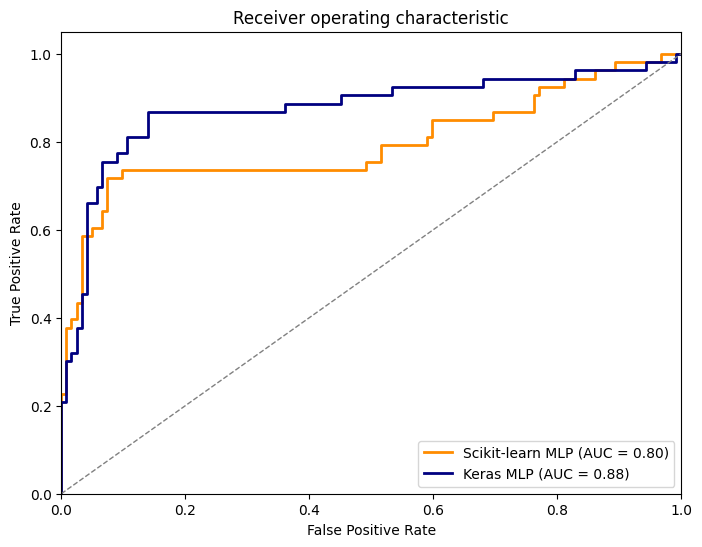

Scikit-learn MLP AUC: 0.80
Keras MLP AUC: 0.88


In [48]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='Scikit-learn MLP (AUC = %0.2f)' % auc_mlp)
plt.plot(fpr_keras, tpr_keras, color='navy', lw=2, label='Keras MLP (AUC = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Scikit-learn MLP AUC:','%.2f' %  auc_mlp)
print('Keras MLP AUC:', '%.2f' %auc_keras)

# **2. Case Two: Health insurance**

**MLP regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?



**Using ANN for regression problems**

Read about MLP regressors at:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

## **2.1 Loadding data**

In [49]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'

In [50]:
#loading data
records = pd.read_csv(url)

records.head()

,age,sex,bmi,dependants,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **2.2 Data pre-processing and EDA**

### **Inspecting and cleansing data**
* Inspect columns
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


In [51]:
# Write code to view size, list of variables and data types; hint: use info()


In [52]:
# Write code to view samples; hint: use sample(n) where a is the number of samples
print(records.sample(10))

      age     sex    bmi  dependants smoker     region      charges
536    33  female  38.90           3     no  southwest   5972.37800
64     20  female  22.42           0    yes  northwest  14711.74380
264    53  female  38.06           3     no  southeast  20462.99766
927    57  female  20.10           1     no  southwest  12032.32600
672    36    male  29.70           0     no  southeast   4399.73100
487    19    male  28.70           0     no  southwest   1253.93600
723    19    male  35.40           0     no  southwest   1263.24900
1213   52  female  33.30           2     no  southwest  10806.83900
1295   20    male  22.00           1     no  southwest   1964.78000
33     63    male  28.31           0     no  northwest  13770.09790


In [53]:
#Write code to inspect missing data; hint: isnull().sum()
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.

**Explore the relationships between the target variable and other variables, and explore the relationships among the non-target variables as well**

**Explore the target variable**

In [54]:
#Write code to show statistics of the target variable
records['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

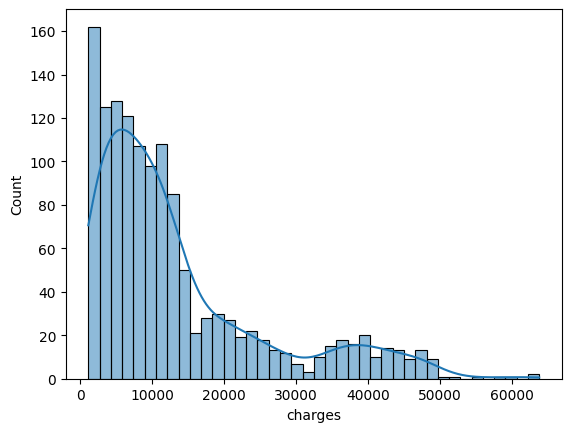

In [55]:
#Write code to show data distribution of the target variable
sns.histplot(data=records, x='charges', bins=40, kde=True)

<Axes: xlabel='charges'>

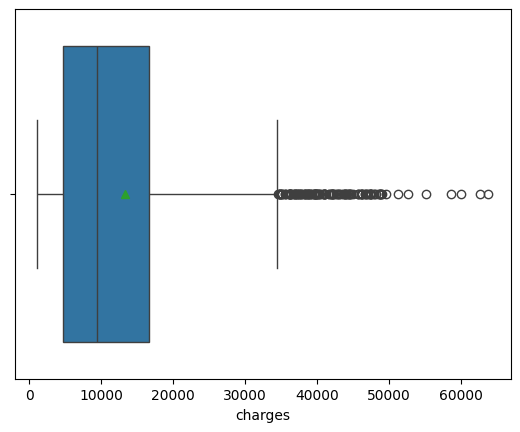

In [56]:
#Write code to show boxplot of the target variable
sns.boxplot(data=records, x='charges', showmeans=True)

In [57]:
records.describe()

,age,bmi,dependants,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Note the range.

age :

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64




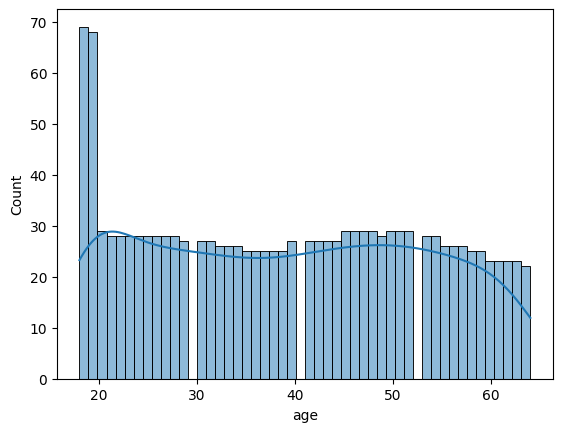

bmi :

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64




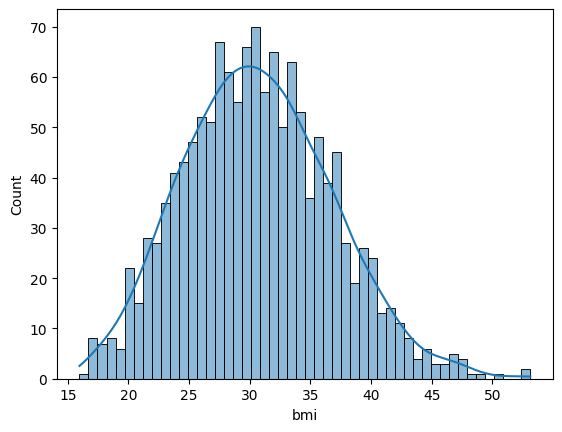

dependants :

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: dependants, dtype: float64




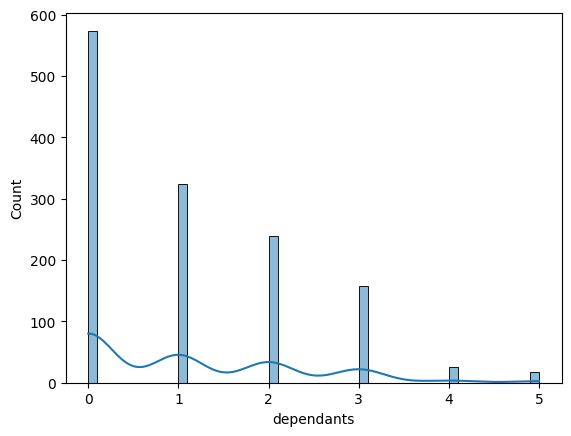

charges :

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64




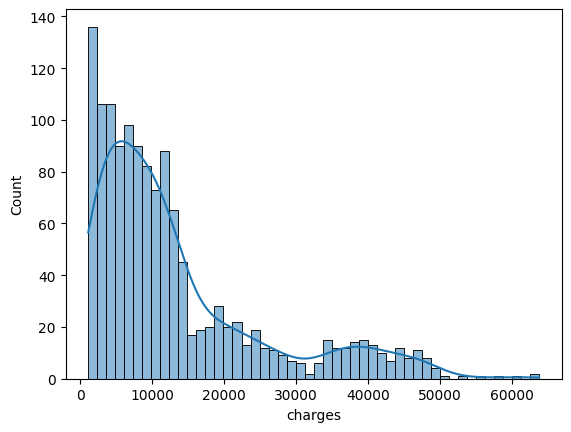

In [58]:
#Let's create both descriptive stats and histograms for numeric variables
nums=['age', 'bmi', 'dependants', 'charges']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins = 50, kde=True)
   plt.show()

sex :

sex
male      676
female    662
Name: count, dtype: int64




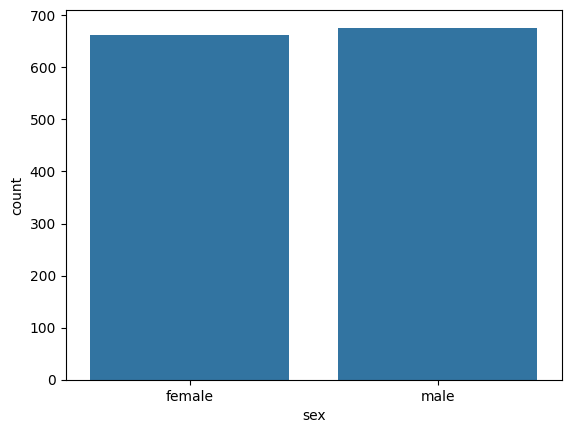

smoker :

smoker
no     1064
yes     274
Name: count, dtype: int64




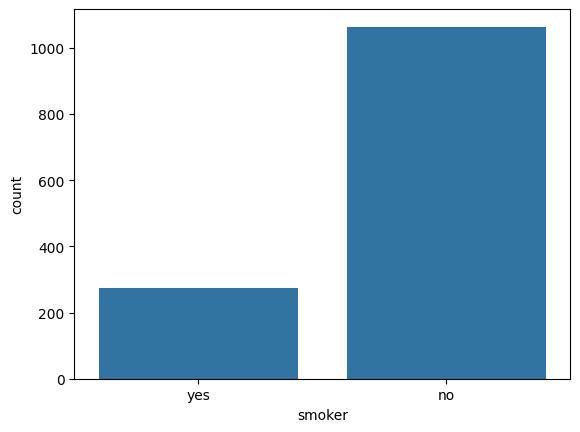

region :

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




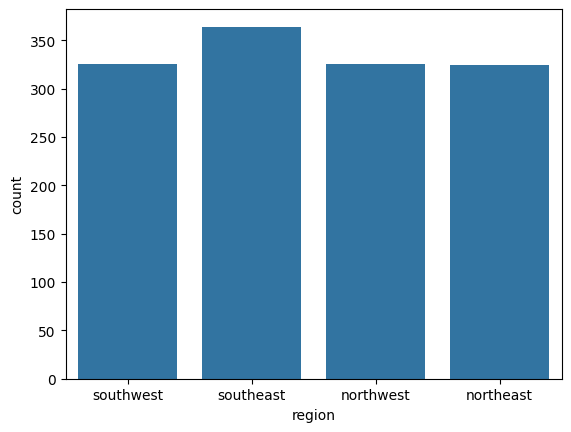

In [59]:
#List the categorical variables and print value_counts and countplots
cats=['sex','smoker', 'region']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(x=records[i])
   plt.show()

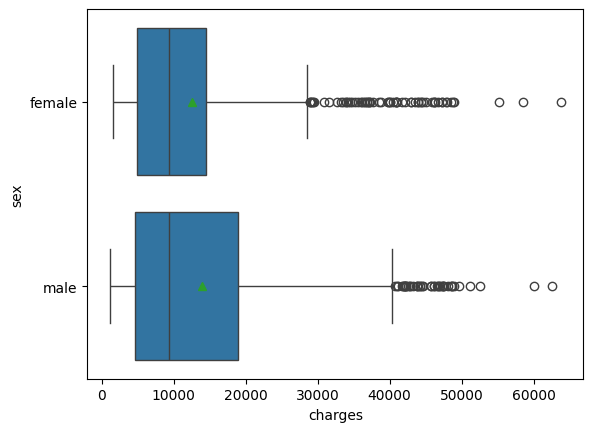

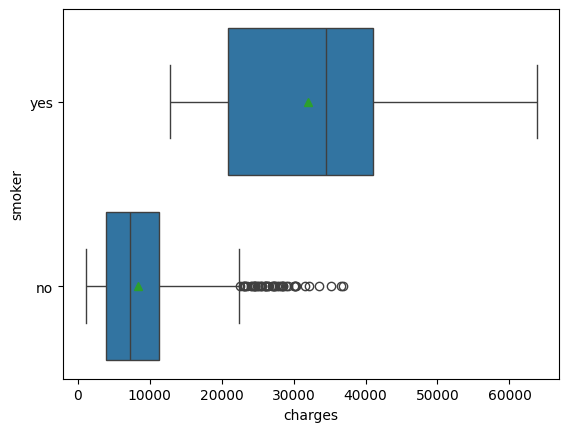

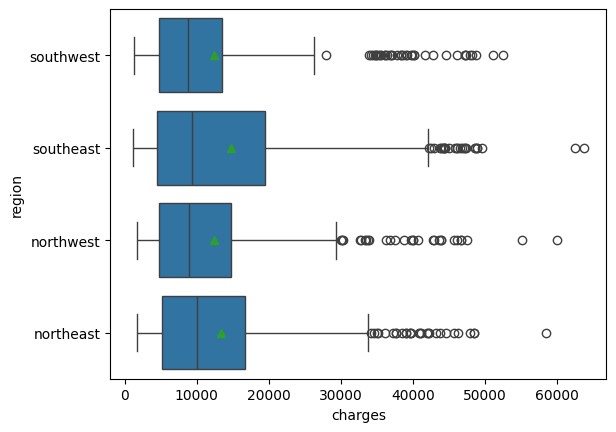

In [60]:
#Examine the distribution of the target by the categorical data
for i in cats:
   sns.boxplot(data=records, x='charges', showmeans=True, y=i)
   plt.show()

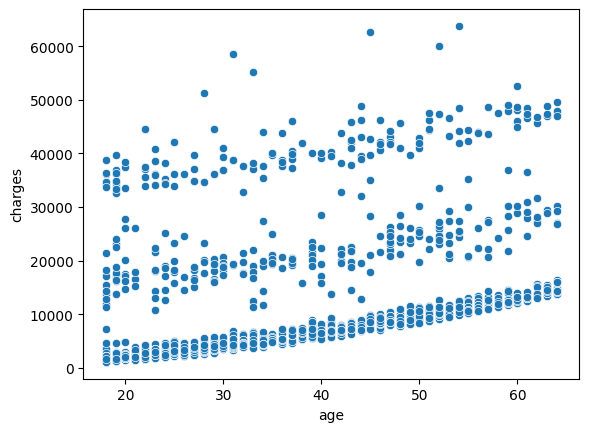

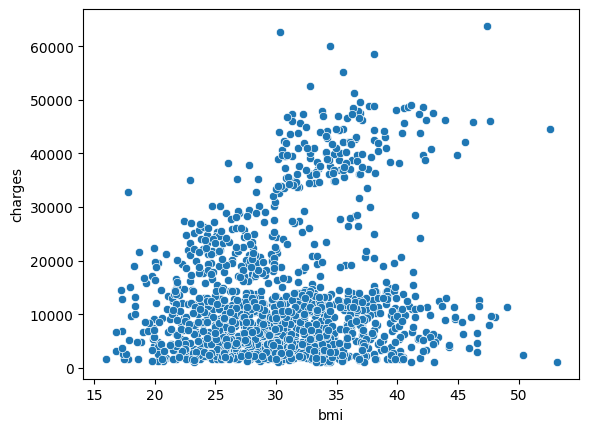

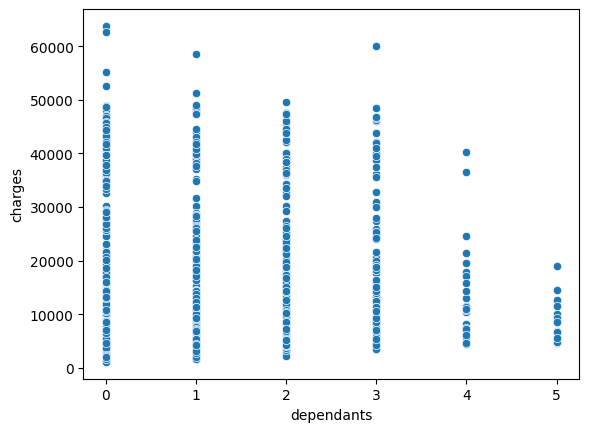

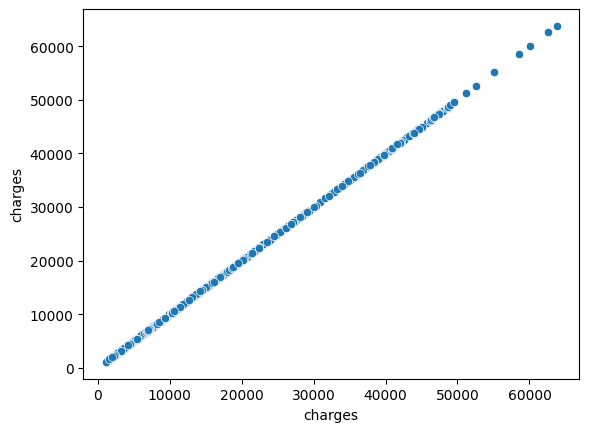

In [61]:
#Write code to examine the relationships between each numeric variable and the target
for i in nums:
   sns.scatterplot(data=records, y='charges', x=i)
   plt.show()

### **Data preparation**
* Data conversion
* Feature selection
* Target specification
* Data spliting
* Data scaling (X_train and X-test)

**Data conversion**

In [62]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=['sex','smoker', 'region'], drop_first=True)


In [63]:
records=records.rename(columns={'smoker_yes': 'smoker'})

If there is more than 2 values in smoker and they are ordinal, you can use use mapping; since there are only 2 values, it is fine to go one hot encoding or dummaries.

In [64]:
print(records.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   dependants        1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker            1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB
None


In [65]:
records.head()

,age,bmi,dependants,charges,sex_male,smoker,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [66]:
try:
    # save the DataFrame to a CSV file
    records.to_csv('/content/drive/My Drive/Colab Notebooks/MIS710 2023 T2/Week 7/Insurance_processed.csv', index=False)
    print('File saved successfully!')
except Exception as e:
    print(f'An error occurred: {e}')

File saved successfully!



**Feature selection and target specification**

In [67]:
X=records.drop('charges', axis=1)
y=records['charges']

Discuss: should we or should we not drop regions?

**Split and scale the feature data**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [70]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**OPTIONAL: Robust Scaling** uses the median and the Interquartile Range (IQR) to scale data. It is robust to outliers and doesn't assume any particular distribution of the data.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [71]:
X_test.head()

,age,bmi,dependants,sex_male,smoker,region_northwest,region_southeast,region_southwest
748,47,36.000,1,False,False,False,False,True
745,50,30.115,1,False,False,True,False,False
57,18,31.680,2,True,True,False,True,False
546,28,35.435,0,True,False,False,False,False
279,51,21.560,1,False,False,False,True,False


## **2.3 MLPRegressor model building for the regression problem**

Read about the MLP regressors at:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

**Load libraries**

In [72]:
#import MLPRegressor and metric functions
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [73]:
# Initialise an ANN model
ann_reg = MLPRegressor(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=1000, random_state=2023)

In [74]:
# Fit it to the scaled training data
ann_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2023)

The "adam" solver, adaptive moment estimation, is a variant of stochastic gradient descent (SGD) designed for large datasets and high-dimensional parameter spaces.

In [75]:
# Use the trained model to predict on the scaled test data
y_pred_mlp= ann_reg.predict(X_test_scaled)


In [76]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_mlp})
inspection.sample(10)

,Actual,Predicted
561,10923.93320,13023.151285
1055,10594.50155,11871.843280
667,40003.33225,33320.962223
1144,9630.39700,11271.225057
1320,5425.02335,7544.897997
339,8232.63880,9807.952058
618,34439.85590,27034.891461
425,9788.86590,10016.669299
238,17352.68030,26347.528311
745,9910.35985,11648.697664


## **2.4. Performance Evaluation**
* Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable.

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination.

In [77]:
# Calculate RMSE, R-squared, and MAE
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# Print the evaluation metrics
print("Scikit learn MLP RMSE: {:.3f}" .format(rmse_mlp))
print("Scikit learn MLP MAE: {:.3f}" .format(mae_mlp))
print("Scikit learn MLP R-squared: {:.3f}" .format(r2_mlp))

Scikit learn MLP RMSE: 5699.234
Scikit learn MLP MAE: 4029.807
Scikit learn MLP R-squared: 0.753


In [78]:
inspection.Actual.describe()

count      268.000000
mean     13237.389262
std      11496.434737
min       1136.399400
25%       4844.585687
50%       9741.507625
75%      17576.844690
max      48673.558800
Name: Actual, dtype: float64

In [79]:
inspection.Predicted.describe()

count      268.000000
mean     13488.184081
std       9968.748862
min        767.162263
25%       6404.979185
50%      10265.323352
75%      14967.126026
max      39226.669897
Name: Predicted, dtype: float64

Note the min, If you have negative predictions! Check the data distributions:

<Axes: xlabel='Actual', ylabel='Predicted'>

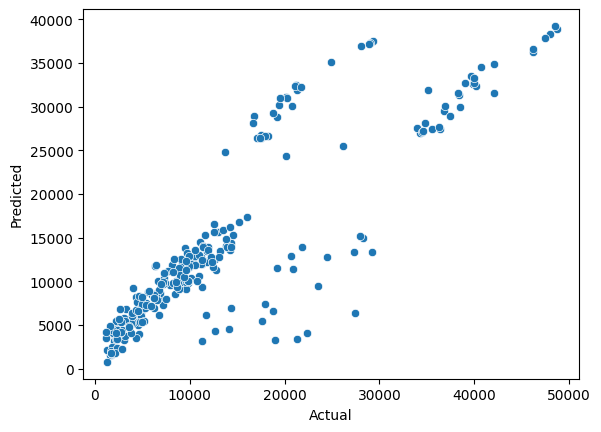

In [80]:
sns.scatterplot(data=inspection, x='Actual', y='Predicted')

OPTIONAL: MLP regressor models can predict any real number from negative infinity to positive infinity, depending on the combination of feature values and learned weights. Therefore, negative predictions are mathematically possible. There may also be other reasons: data quality such as outliers, model complexity, data scaling changes the relationships etc. We can post-process the results.

In [81]:
# For example, we can set negative predictions to a base insurance premium, e.g. 1131.5 from the y_test values
y_pred_mlp = np.maximum(y_pred_mlp, 1131.5)

In [82]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_mlp})

In [83]:
# Calculate RMSE, R-squared, and MAE
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# Print the evaluation metrics
print("Scikit learn MLP RMSE: {:.3f}" .format(rmse_mlp))
print("Scikit learn MLP MAE: {:.3f}" .format(mae_mlp))
print("Scikit learn MLP R-squared: {:.3f}" .format(r2_mlp))

Scikit learn MLP RMSE: 5699.164
Scikit learn MLP MAE: 4028.447
Scikit learn MLP R-squared: 0.753


In [84]:
inspection.Actual.describe()

count      268.000000
mean     13237.389262
std      11496.434737
min       1136.399400
25%       4844.585687
50%       9741.507625
75%      17576.844690
max      48673.558800
Name: Actual, dtype: float64

In [85]:
inspection.Predicted.describe()

count      268.000000
mean     13489.543550
std       9967.032254
min       1131.500000
25%       6404.979185
50%      10265.323352
75%      14967.126026
max      39226.669897
Name: Predicted, dtype: float64

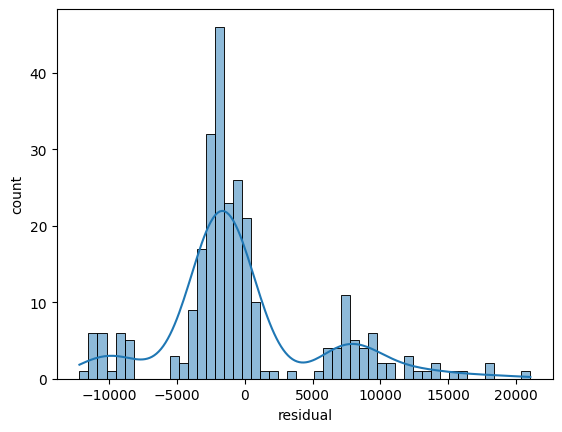

In [86]:
# Plot residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred_mlp, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

In [87]:
#occasionally plt complains about str, then run the following code
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

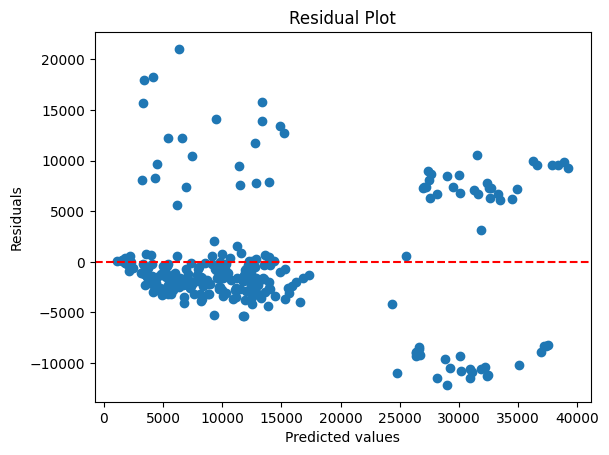

In [88]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_mlp, y_test-y_pred_mlp)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## **2.5 OPTIONAL: A Brief Intro to Keras (cont)**

### **Model Building**

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

In [90]:
X_train_scaled.shape

(1070, 8)

In [91]:
# construct the keras model
mlp_keras = Sequential()
mlp_keras.add(Dense(32, input_dim=6, activation='relu', input_shape=(X_train_scaled.shape[1],)))
mlp_keras.add(Dense(16, activation='relu'))
mlp_keras.add(Dense(1, activation='linear'))

# compile the keras model
mlp_keras.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# fit the keras model on the dataset
history = History()
history=mlp_keras.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[history])



The fit() function returns a History object that contains information about the training process, it stores the training loss and accuracy values for each epoch of the training process, as well as the validation loss and accuracy values if validation data is provided.

In [92]:
# make predictions using the model
y_pred_keras = mlp_keras.predict(X_test_scaled)



9/9 [==============================] - 0s 11ms/step


### **Performance Evaluation**

* Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable.

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination.

In [93]:
# calculate evaluation metrics
rmse_keras = np.sqrt(mean_squared_error(y_test, y_pred_keras))
mae_keras = mean_absolute_error(y_test, y_pred_keras)
r2_keras = r2_score(y_test, y_pred_keras)

print('Keras MLP RMSE: {:.2f}'.format(rmse_keras))
print('Keras MLP MAE: {:.2f}'.format(mae_keras))
print('Keras MLP R-squared: {:.2f}'.format(r2_keras))


Keras MLP RMSE: 8719.52
Keras MLP MAE: 7031.07
Keras MLP R-squared: 0.42


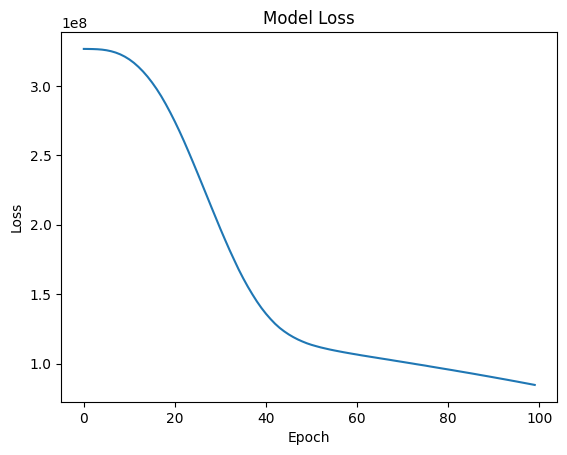

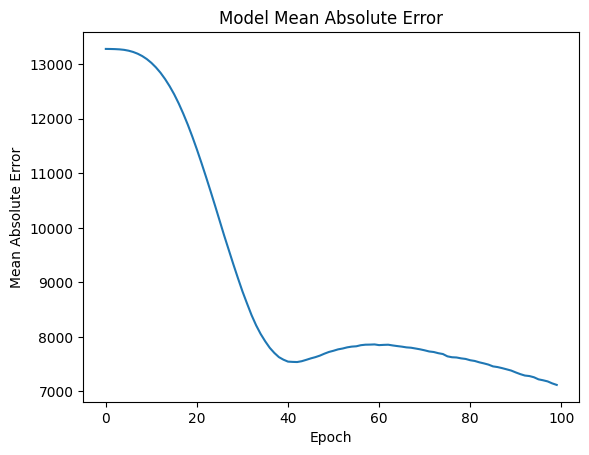

In [94]:
# plot the loss and accuracy over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.show()

In [95]:
# Calculate the residuals
residuals_keras = y_test - y_pred_keras.squeeze()


In [96]:
#occasionally plt complains about str, then run the following code
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

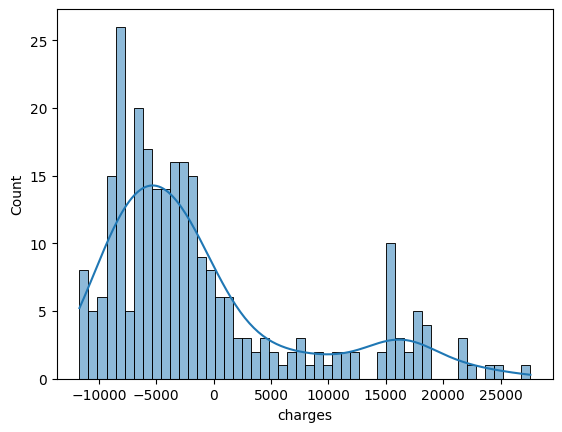

In [97]:
#Plot residuals, i.e. the differences between the actual and predicted values.
sns.histplot(residuals_keras, bins=50, kde=True)
plt.xlabel='error'
plt.ylabels='count'
plt.show()

In [98]:
#run the below if you have problem with 'str' object is not callable - some variable is taken a built in function
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

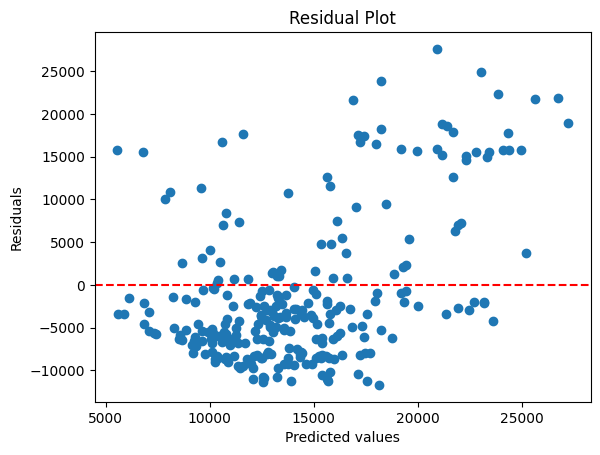

In [99]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_keras, residuals_keras)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## **2.6 Model Comparision**

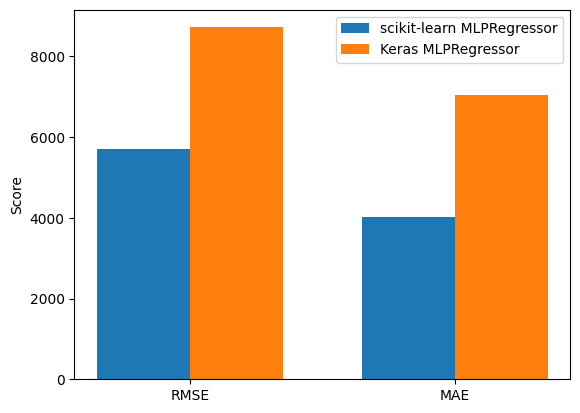

In [100]:
# Create bar plot for the evaluation metrics
labels = ['RMSE', 'MAE']
mlp_scores = [rmse_mlp, mae_mlp]
keras_scores = [rmse_keras, mae_keras]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mlp_scores, width, label='scikit-learn MLPRegressor')
rects2 = ax.bar(x + width/2, keras_scores, width, label='Keras MLPRegressor')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [101]:
# Calculate the regression line
slope_mlp, intercept_mlp = np.polyfit(y_test, y_pred_mlp, 1)
regression_line_mlp = slope_mlp * y_test + intercept_mlp

In [102]:
# Calculate the regression line
slope_keras, intercept_keras = np.polyfit(y_test, y_pred_keras, 1)
regression_line_keras = slope_keras * y_test + intercept_keras

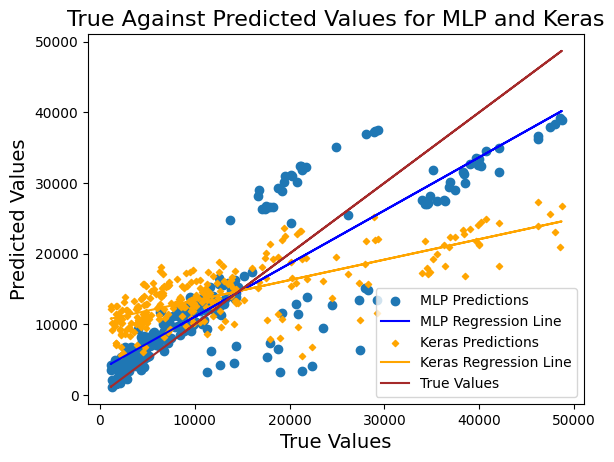

In [103]:
# Create a scatter plot of true against predicted values for MLP and Keras
plt.scatter(y_test, y_pred_mlp, label='MLP Predictions')
plt.plot(y_test, regression_line_mlp, color='blue', label='MLP Regression Line')
plt.scatter(y_test, y_pred_keras, marker='D', s=10, color='orange', label='Keras Predictions')
plt.plot(y_test, regression_line_keras, color='orange', label='Keras Regression Line')

# Add dots along the diagonal to mark where true values should lie
plt.plot(y_test, y_test, color='brown', label='True Values')

plt.title('True Against Predicted Values for MLP and Keras', fontsize=16)
plt.ylabel('Predicted Values', fontsize=14)
plt.xlabel('True Values', fontsize=14)
plt.legend(loc="lower right", fontsize=10)  # Increase font size for the legend
plt.show()

You can use another algorithm other than Keras, such as KNN we learned in Topic 6

## **2.7 KNN and Comparison**

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 1068 to 855
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   dependants        1070 non-null   int64  
 3   sex_male          1070 non-null   bool   
 4   smoker            1070 non-null   bool   
 5   region_northwest  1070 non-null   bool   
 6   region_southeast  1070 non-null   bool   
 7   region_southwest  1070 non-null   bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 38.7 KB


sqrt of 1070 is between 32 and 33, you can select 32 or 33

In [106]:
# Create a KNN regressor object
k=33
knn = KNeighborsRegressor(k)

# Write code to fit the model to the training data
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=33)

In [107]:
# Write code to Predict the house prices for the testing data
y_pred_knn = knn.predict(X_test_scaled)

In [108]:
# Calculate performance metrics for the SECOND model
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_2 = r2_score(y_test, y_pred_knn)
mae_2 = mean_absolute_error(y_test, y_pred_knn)

In [109]:
# Print performance metrics for the SECOND model
print("Root Mean Squared Error: {:.3f}".format(rmse_2))
print("R Squared: {:.3f}".format(r2_2))
print("Absolute Squared Error: {:.3f}".format(mae_2))

Root Mean Squared Error: 6149.137
R Squared: 0.713
Absolute Squared Error: 3960.927


In [110]:
# Calculate the regression line
slope_knn, intercept_knn = np.polyfit(y_test, y_pred_knn, 1)
regression_line_knn = slope_knn * y_test + intercept_knn

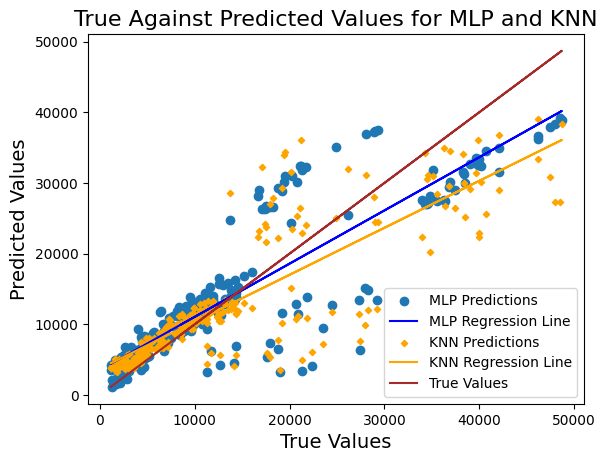

In [111]:
# Create a scatter plot of true against predicted values for MLP and Keras
plt.scatter(y_test, y_pred_mlp, label='MLP Predictions')
plt.plot(y_test, regression_line_mlp, color='blue', label='MLP Regression Line')
plt.scatter(y_test, y_pred_knn, marker='D', s=10, color='orange', label='KNN Predictions')
plt.plot(y_test, regression_line_knn, color='orange', label='KNN Regression Line')

# Add dots along the diagonal to mark where true values should lie
plt.plot(y_test, y_test, color='brown', label='True Values')

plt.title('True Against Predicted Values for MLP and KNN', fontsize=16)
plt.ylabel('Predicted Values', fontsize=14)
plt.xlabel('True Values', fontsize=14)
plt.legend(loc="lower right", fontsize=10)  # Increase font size for the legend
plt.show()

# **OPTIONAL 3. Digit Recognition**

A simple example of digit recognition using the MNIST dataset.

Warning: it takes a while - 1h 30m 6'.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

# Extract the data and labels
X = mnist.data
y = mnist.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=2023, max_iter=1000, penalty='l2', C=2, solver='liblinear')
clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")